# Calculate optimal 2 by 2 with 30 degree angles

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

prefill replay memory
start training
 new max record arrange grid:  2.25


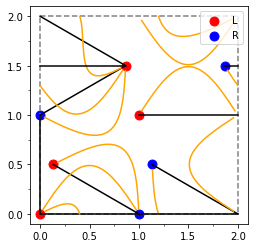

 new max record arrange grid:  2.75


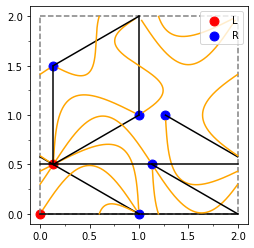

 new max record arrange grid:  3.0


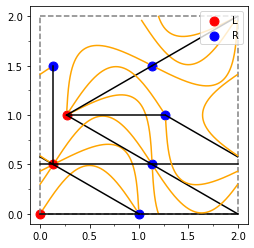

   10 mean training reward:  2.52
   20 mean training reward:  2.35
 new max record arrange grid:  4.0


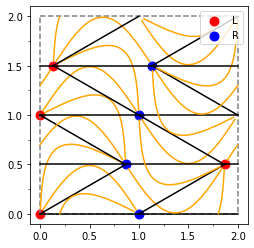

   30 mean training reward:  2.62
   40 mean training reward:  2.30
   50 mean training reward:  2.17
   60 mean training reward:  2.17
   70 mean training reward:  2.20
   80 mean training reward:  2.12
   90 mean training reward:  2.40
  100 mean training reward:  2.35
  110 mean training reward:  2.33
  120 mean training reward:  2.52
  130 mean training reward:  2.48
  140 mean training reward:  2.88
  150 mean training reward:  2.83
  160 mean training reward:  2.58
  170 mean training reward:  2.88
  180 mean training reward:  2.80
  190 mean training reward:  2.62
  200 mean training reward:  3.05
done


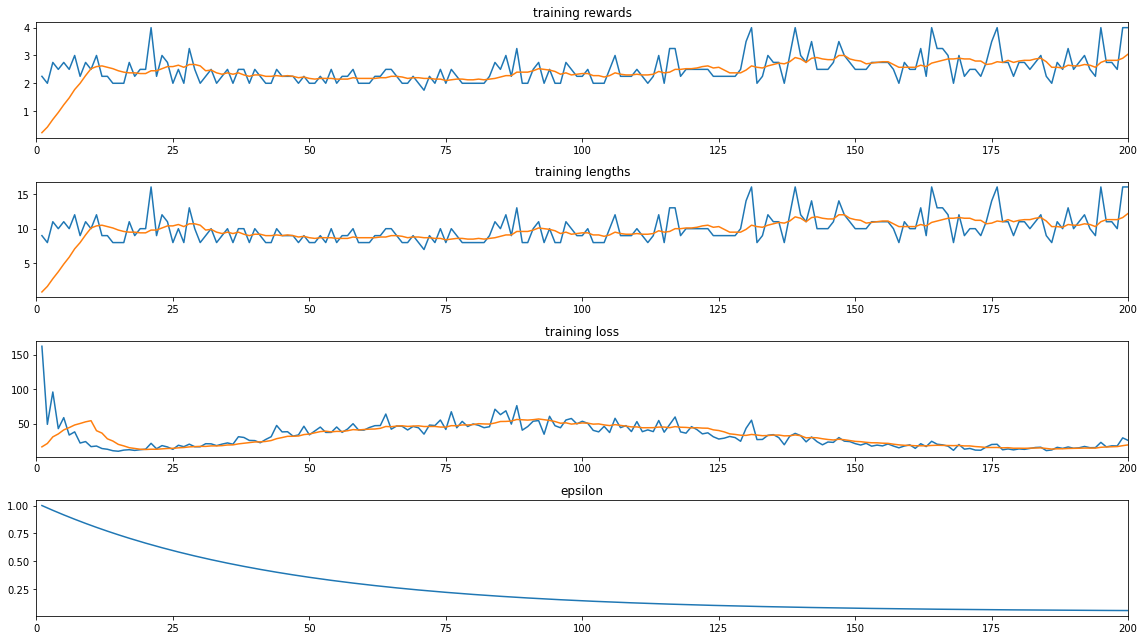

[2.25, 2.25, 2.75, 2.75, 3.0, 3.0, 4.0, 4.0]
[1, 3, 3, 7, 7, 21, 21, 200]


In [2]:
# we start from scratch here
subgraphs = Subgraphs(angles=[0, 30, 90, 150, 180],
                      lengths=[1])

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=3,
                           n_cells_y=3,
                           subgraphs=subgraphs)

NUM_EPISODES = 200 #15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=12, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64,#8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000,#16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=False)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished

In [ ]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()

In [ ]:
# save model parameters
agent.save_hyperparameters(fname='hyperparams')
# for saving the state of the model simply do
agent.save_model(agent.policy_dqn, file_name='model')

In [ ]:
max(agent.rewards)

In [ ]:
load_agent = QAgentReplayMemory.from_hyperparameters('hyperparams')
best_model = load_agent.load_model(file_name='model')

# load_agent.predict(model=best_model, num_episodes=20, epsilon=0, save_best_graph=False)

In [ ]:
load_agent.get_graph_state()